# Avalanche Danger Level Forecast: Snow Data Exploratory Data Analysis

I am going to explore the snow dataset features to aid in cleaning and further understanding of variable correlation

## Import Tools

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# pandas
from pandas.plotting import scatter_matrix

## Import Data

In [2]:
snow = pd.read_csv('MWACSnowData.csv')
print(snow)

          DATE     SEASON  AVY_DANGER AVY_CHARACTER  WET_DANGER  DRY_DANGER  \
0     12/18/10  2010/2011         2.0           DRY           0           2   
1     12/19/10  2010/2011         1.0           DRY           0           1   
2     12/20/10  2010/2011         1.0           DRY           0           1   
3     12/21/10  2010/2011         3.0           DRY           0           3   
4     12/22/10  2010/2011         2.0           DRY           0           2   
...        ...        ...         ...           ...         ...         ...   
1253   3/25/20  2019/2020         3.0          BOTH           3           3   
1254   3/26/20  2019/2020         3.0           WET           3           0   
1255   3/27/20  2019/2020         2.0           DRY           0           2   
1256   3/28/20  2019/2020         1.0           DRY           0           1   
1257   3/29/20  2019/2020         2.0           WET           2           0   

      WET_LOOSE  WET_SLAB  WIND_SLAB  STORM_SLAB  .

## Dataset at a Glance

In [3]:
snow.describe()

AVY_DANGER   WET_DANGER   DRY_DANGER    WET_LOOSE     WET_SLAB  \
count  1155.000000  1258.000000  1258.000000  1155.000000  1155.000000   
mean      2.105628     0.418919     1.654213     0.290909     0.341126   
std       0.897287     0.863025     1.245064     0.694279     0.859041   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     0.000000     2.000000     0.000000     0.000000   
75%       3.000000     0.000000     3.000000     0.000000     0.000000   
max       5.000000     4.000000     5.000000     4.000000     4.000000   

         WIND_SLAB   STORM_SLAB  CORNICE_FALL  PERSISTENT_SLAB    DEEP_SLAB  \
count  1155.000000  1155.000000   1155.000000      1155.000000  1155.000000   
mean      1.763636     0.212121      0.001732         0.158442     0.003463   
std       1.209607     0.822680      0.058849         0.620285     0.093024   
min       0.000000     0.000000      0.000000         0.000000     0.000000   
25%       1.000000     0.000000      0.000000         0.000000     0.000000   
50%       2.000000     0.000000      0.000000         0.000000     0.000000   
75%       3.000000     0.000000      0.000000         0.000000     0.000000   
max       5.000000     5.000000      2.000000         4.000000     3.000000   

       ...    HST (CM)       HS_CM  SETTLEMENT/MELT  Surf Temp (C)  \
count  ...  293.000000  835.000000       794.000000     832.000000   
mean   ...   12.041127  109.429621        20.532746      -6.708954   
std    ...   23.869419   54.320875        45.089376       6.573803   
min    ...    0.000000    0.000000       -15.000000     -25.900000   
25%    ...    1.000000   70.000000         0.000000     -11.000000   
50%    ...    4.000000  115.000000         2.000000      -6.500000   
75%    ...   11.500000  153.000000         6.875000      -1.000000   
max    ...  196.000000  238.000000       204.000000      16.000000   

         T-10 (C)    T-20 (C)  CURRENT TEMP  X24_HR_MAX  24HRMAX_SWING  \
count  880.000000  877.000000    882.000000  877.000000     869.000000   
mean    -6.976591   -5.783010     -8.126757   -3.624344       0.098389   
std      5.397727    4.585766      7.277300    8.322385       6.574261   
min    -30.500000  -24.500000    -30.000000  -31.500000     -23.000000   
25%    -10.000000   -8.700000    -13.000000   -9.000000      -3.000000   
50%     -6.250000   -5.000000     -8.000000   -4.000000       0.000000   
75%     -2.600000   -2.000000     -3.000000    2.000000       4.000000   
max      8.000000    8.100000     14.500000   22.000000      34.000000   

        24 HR MIN  
count  879.000000  
mean   -10.651877  
std      7.875199  
min    -54.000000  
25%    -16.000000  
50%    -10.000000  
75%     -5.000000  
max     14.000000  

[8 rows x 40 columns]

In [4]:
snow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 1258 non-null   object 
 1   SEASON               1258 non-null   object 
 2   AVY_DANGER           1155 non-null   float64
 3   AVY_CHARACTER        1155 non-null   object 
 4   WET_DANGER           1258 non-null   int64  
 5   DRY_DANGER           1258 non-null   int64  
 6   WET_LOOSE            1155 non-null   float64
 7   WET_SLAB             1155 non-null   float64
 8   WIND_SLAB            1155 non-null   float64
 9   STORM_SLAB           1155 non-null   float64
 10  CORNICE_FALL         1155 non-null   float64
 11  PERSISTENT_SLAB      1155 non-null   float64
 12  DEEP_SLAB            1155 non-null   float64
 13  DRY_LOOSE            1155 non-null   float64
 14  GLIDE_AVALANCHE      1155 non-null   float64
 15  LONG_SLIDING_FALL    1155 non-null   o

## Large-Scale Visualizations

### Using All Relevant Data

In [5]:
rel_features = ['AVY_DANGER', 'AWND', 'PGTM', 'FIVE_DAY_SNOWFALL', 'PRCP', 'SNOW', 'PSUN',
                'SNWD', 'TMAX', 'TMAX_SWING', 'TMAX_SWING_FROM_AVE', 'TMIN', 'WDF5', 
                'SKY CONDITION', 'PRECIP TYPE/RATE', 'FORM/SIZE', 'HN24_CM', 'HW in Tube (MM)',
                'H24W in Can (MM)', 'DENSITY (KG/M3)', 'HST (CM)', 'HS_CM',
                'SETTLEMENT/MELT', 'Surf Temp (C)', 'T-10 (C)', 'T-20 (C)',
                'CURRENT TEMP', 'X24_HR_MAX', '24HRMAX_SWING', '24 HR MIN']

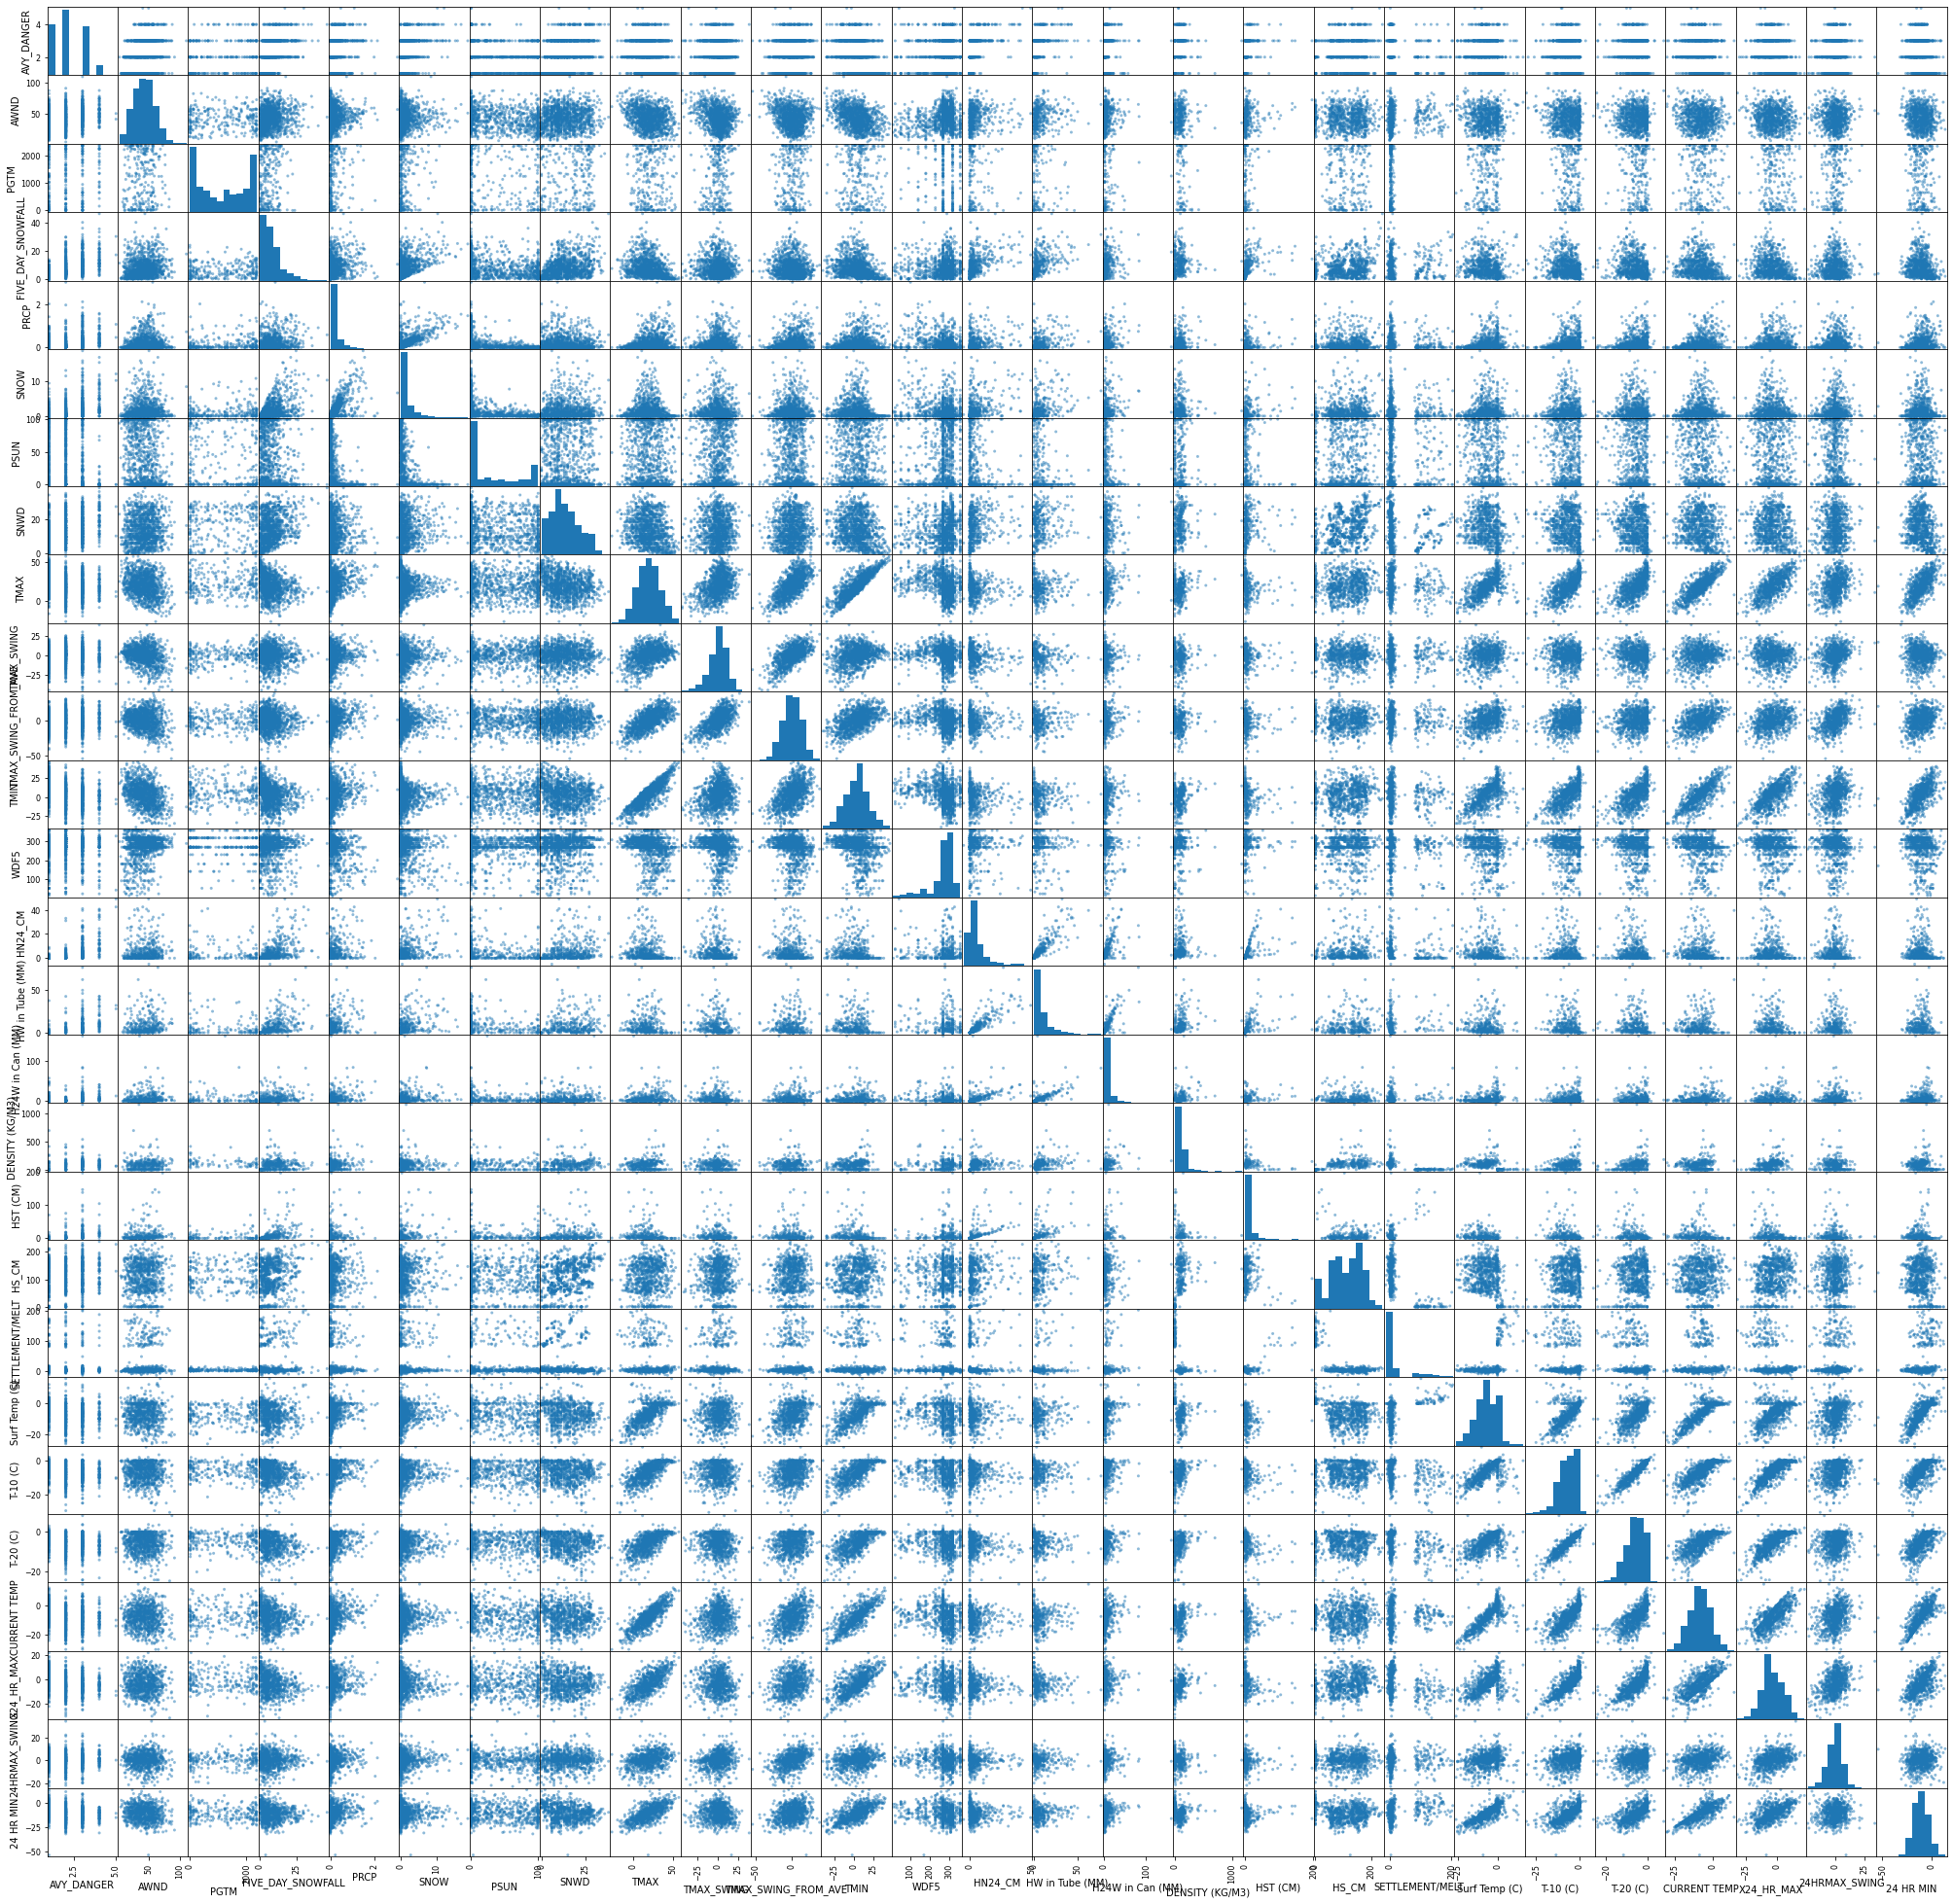

In [6]:
scatter_matrix(snow[rel_features], figsize=(35,35))
plt.show()

### Using Most Consistent Data

These features have the least amount of null values and are the most consistent

In [7]:
con_features = ['AVY_DANGER', 'AWND', 'PRCP', 'PSUN', 'SNOW', 'FIVE_DAY_SNOWFALL', 'SNWD', 'TMAX', 'TMAX_SWING', \
                'TMAX_SWING_FROM_AVE', 'TMIN', 'TSUN', 'WDF5', 'WSF5']

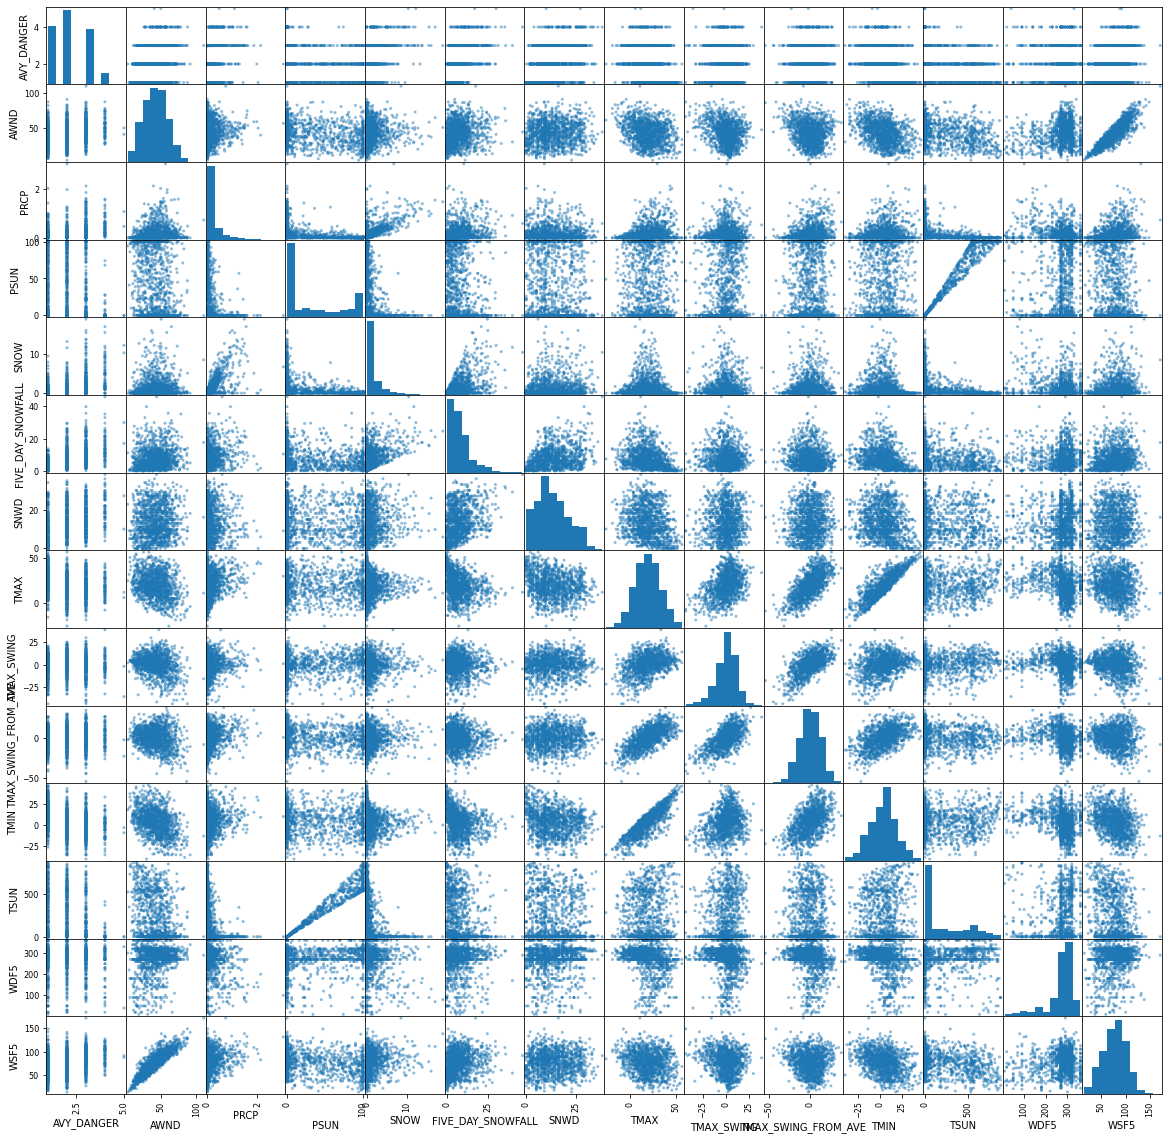

In [8]:
scatter_matrix(snow[con_features], figsize=(20,20))
plt.show()

Extreme Linear Correlations: AWND & WSF5, PSUN & TSUN, TMAX & TMIN
Remove: 
* TSUN because PSUN accounts for different day lengths as well
* WSF5 because AWND provides larger scope of daily wind
* Will keep both TMAX and TMIN because temperature highs and lows known to be important, maybe use for feature creation

In [9]:
con_features.remove('TSUN')
con_features.remove('WSF5')
snow = snow.drop('TSUN', axis=1)
snow = snow.drop('WSF5', axis=1)

## Fixing skewness

In [10]:
snow['LOG_PRCP'] = np.log10(snow['PRCP'])
snow['LOG_SNOW'] = np.log10(snow['SNOW'])
snow['LOG_PSUN'] = np.log10(snow['PSUN'])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
con_features.remove('PRCP')
con_features.remove('SNOW')
con_features.remove('PSUN')
snow = snow.drop('PRCP', axis=1)
snow = snow.drop('SNOW', axis=1)
snow = snow.drop('PSUN', axis=1)

In [12]:
add_features = ['LOG_PRCP', 'LOG_SNOW', 'LOG_PSUN']
snow.replace(-np.Inf, np.nan, inplace=True)
con_features.extend(add_features)
print(con_features)

['AVY_DANGER', 'AWND', 'FIVE_DAY_SNOWFALL', 'SNWD', 'TMAX', 'TMAX_SWING', 'TMAX_SWING_FROM_AVE', 'TMIN', 'WDF5', 'LOG_PRCP', 'LOG_SNOW', 'LOG_PSUN']


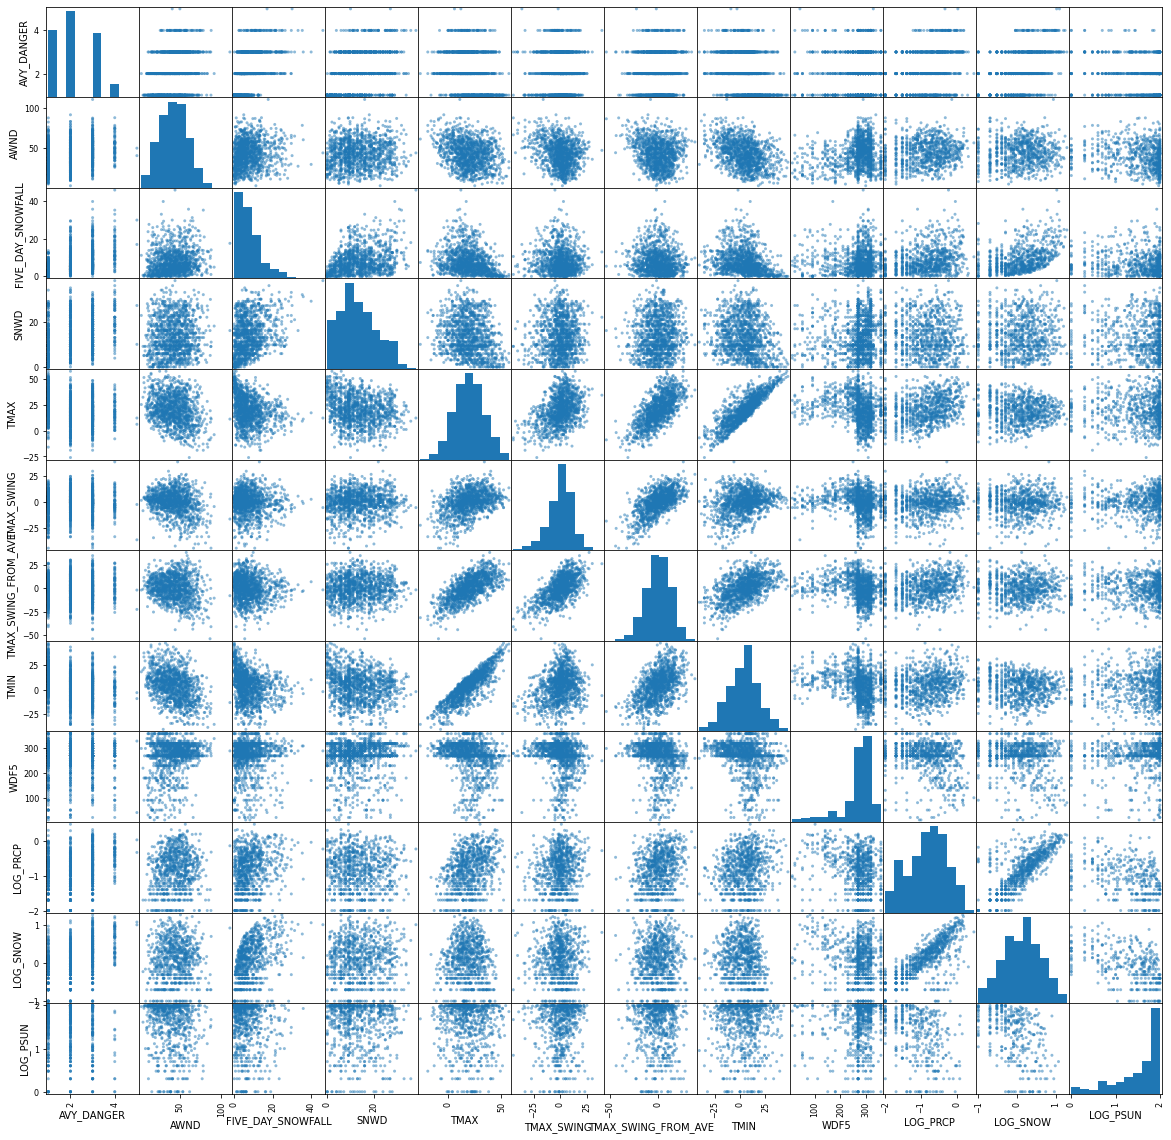

In [13]:
scatter_matrix(snow[con_features], figsize=(20,20))
plt.show()

This has created another quite linear correlation between LOG_PRCP and LOG_SNOW, but this makes sense and will be left as is

# Discovering Feature Correlations with AVY_DANGER

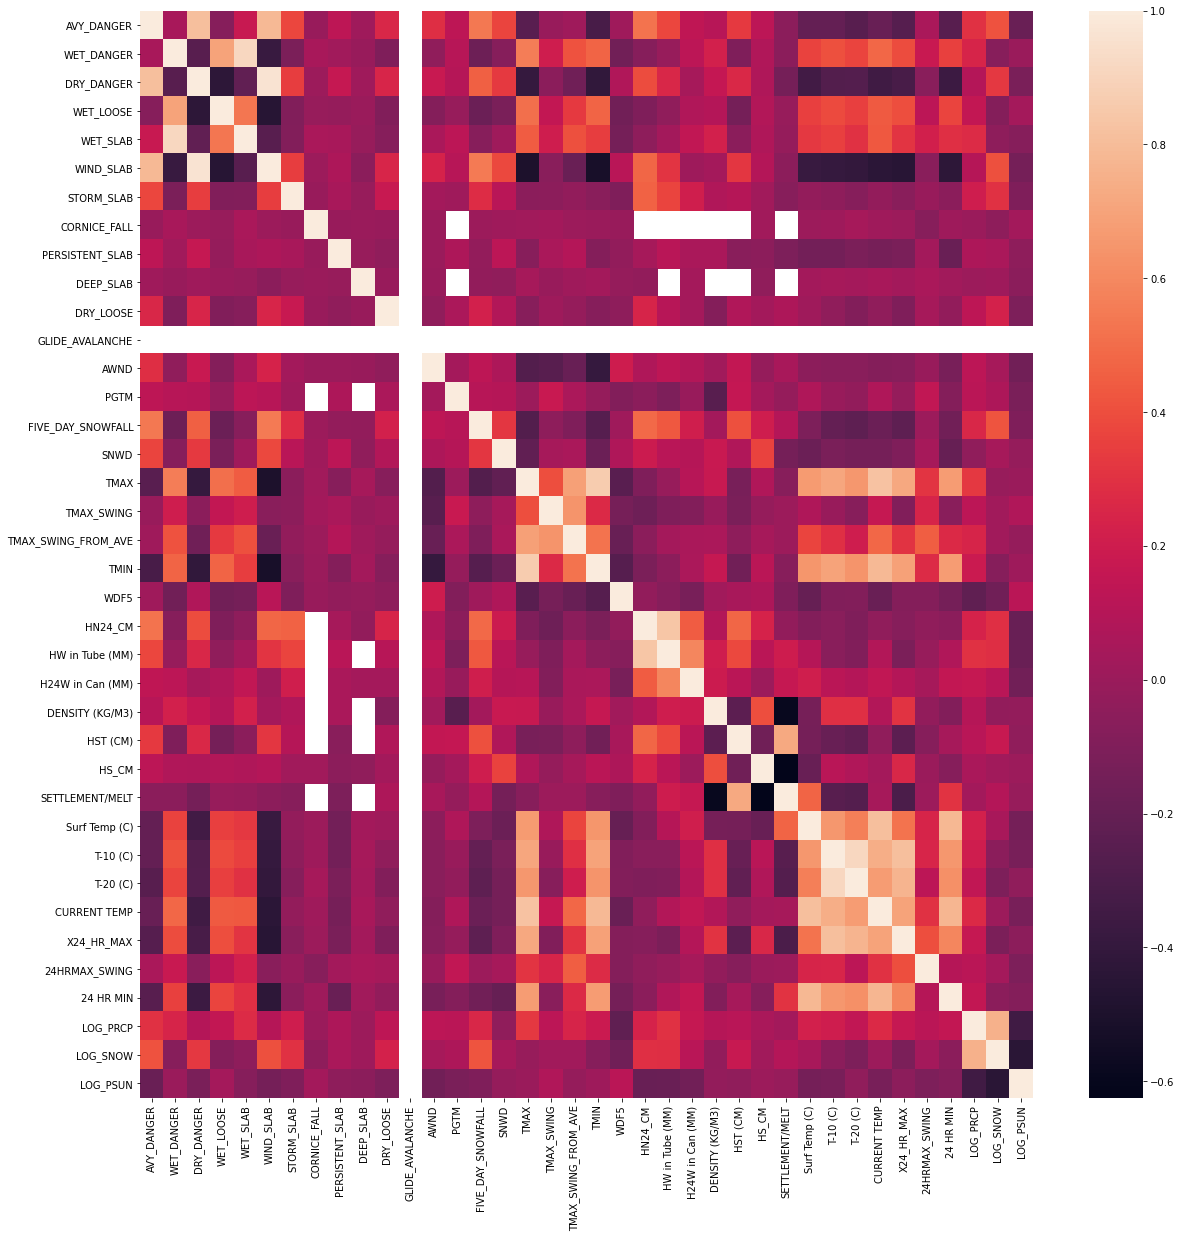

In [14]:
corr_matrix = snow.corr()

f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix)
plt.show()

In [15]:
print(corr_matrix[corr_matrix.iloc[:, 0] > 0.2])
print(corr_matrix[corr_matrix.iloc[:, 0] < -0.2])

                   AVY_DANGER  WET_DANGER  DRY_DANGER  WET_LOOSE  WET_SLAB  \
AVY_DANGER           1.000000    0.048043    0.813917  -0.074406  0.172435   
DRY_DANGER           0.813917   -0.250816    1.000000  -0.431548 -0.213879   
WIND_SLAB            0.788685   -0.381377    0.967567  -0.459773 -0.255080   
STORM_SLAB           0.372269   -0.116760    0.345819  -0.094477 -0.086538   
DRY_LOOSE            0.254319   -0.101324    0.248974  -0.092934 -0.076295   
AWND                 0.286297   -0.034815    0.175344  -0.083552  0.058587   
FIVE_DAY_SNOWFALL    0.538521   -0.168471    0.455056  -0.180009 -0.068284   
SNWD                 0.369380   -0.077644    0.331098  -0.123118  0.017485   
HN24_CM              0.520293   -0.073754    0.395504  -0.099756 -0.046942   
HW in Tube (MM)      0.377300   -0.011275    0.252795  -0.037909  0.029040   
HST (CM)             0.328559   -0.101496    0.263337  -0.141650 -0.059072   
LOG_PRCP             0.296785    0.242511    0.094049   0.149855

The following variables at least somewhat positively correlate with AVY_DANGER:
* DRY_DANGER
* WIND_SLAB
* STORM_SLAB
* DRY_LOOSE
* AWND
* FIVE_DAY_SNOWFALL
* SNWD
* LOG_PRCP
* LOG_SNOW
* HN24_CM
* HW in Tube (MM)
* HST (CM)

The following variables at least somewhat negatively correlate with AVY_DANGER:
* TMAX
* TMIN
* LOG_TSUN
* Surf Temp (C)
* T-10 (C)
* T-20 (C)
* X24_HR_MAX
* 24 HR MIN

# Finding Outliers

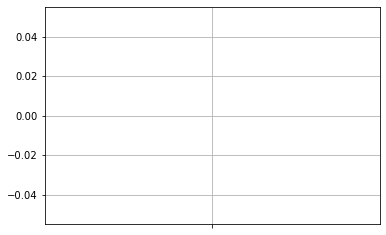

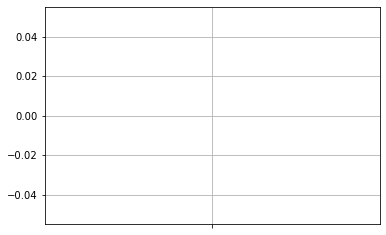

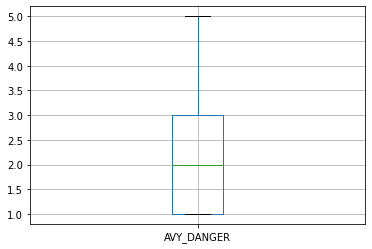

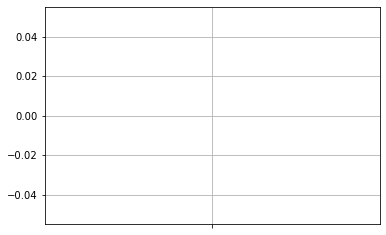

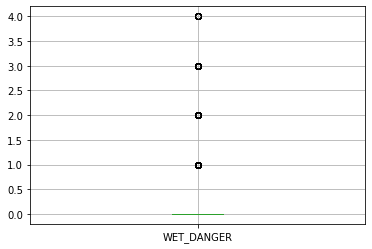

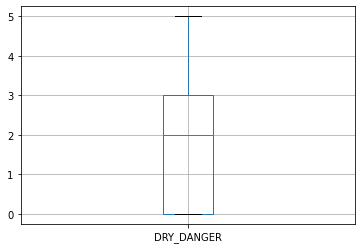

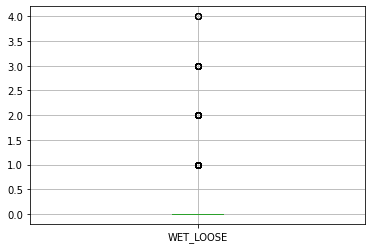

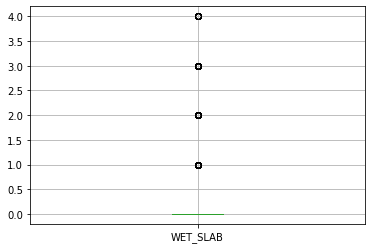

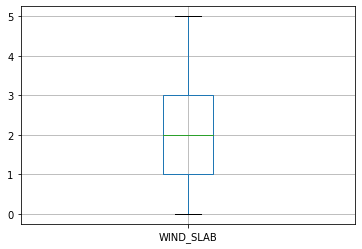

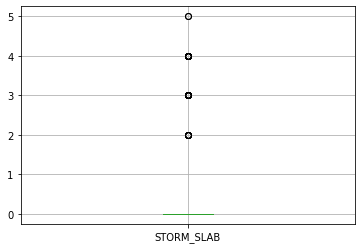

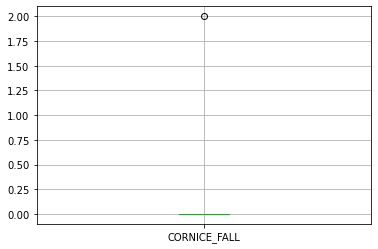

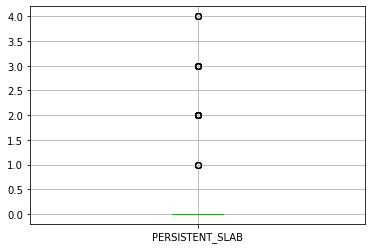

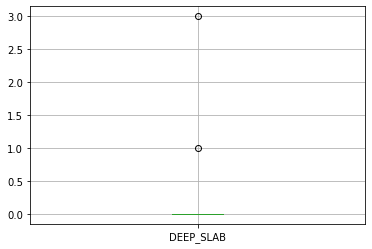

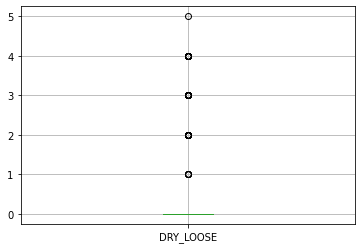

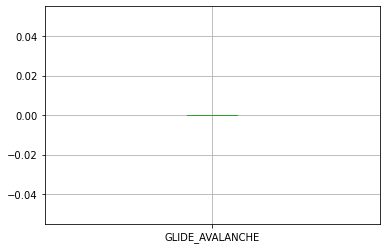

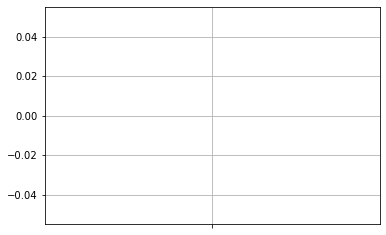

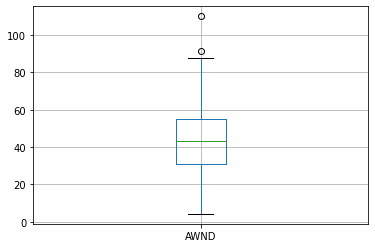

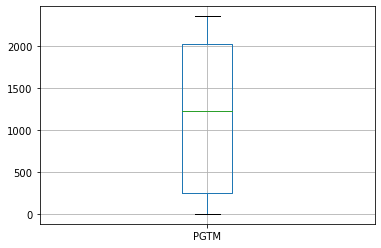

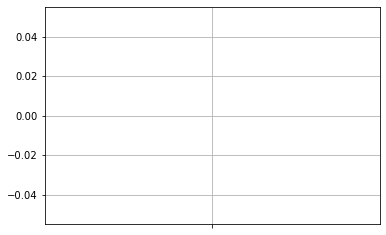

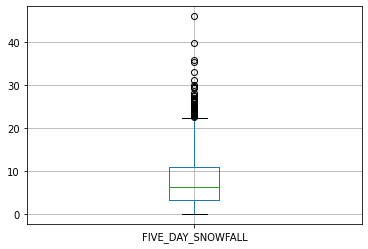

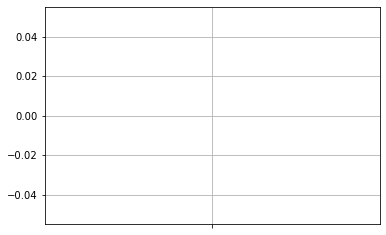

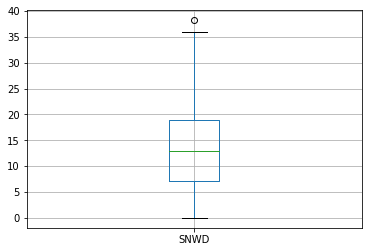

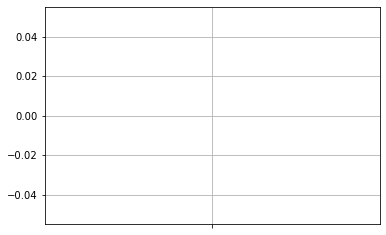

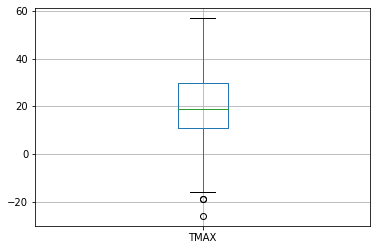

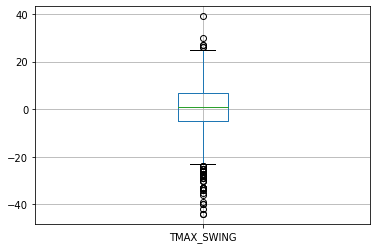

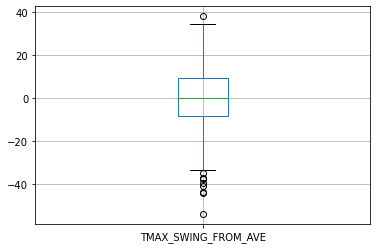

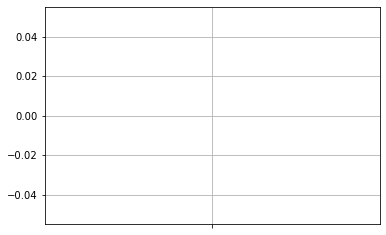

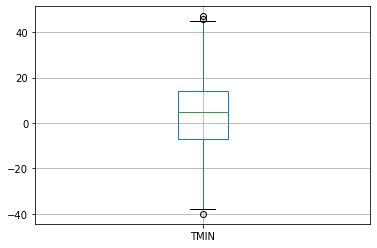

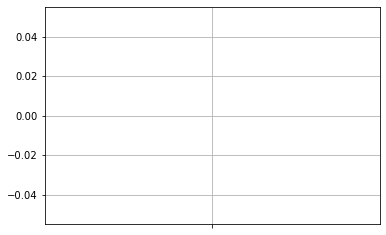

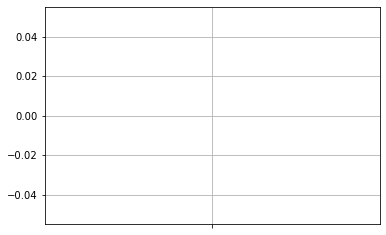

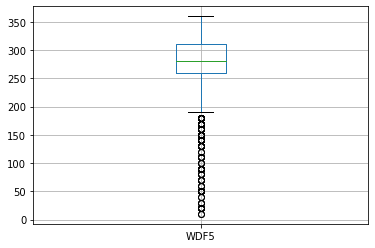

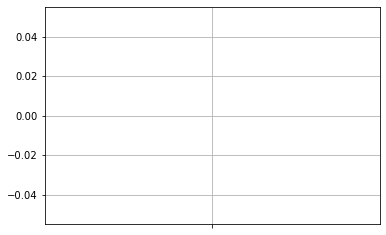

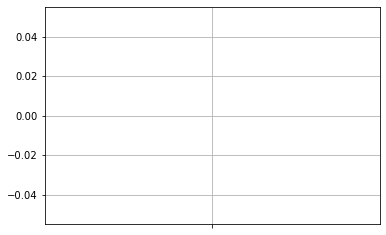

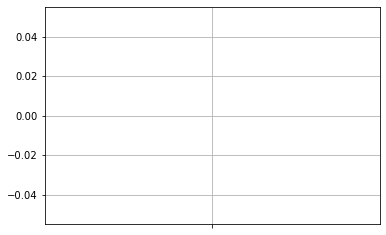

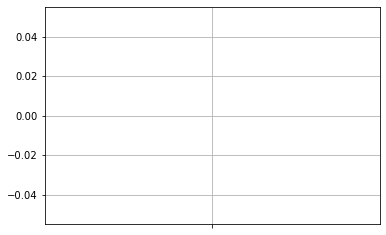

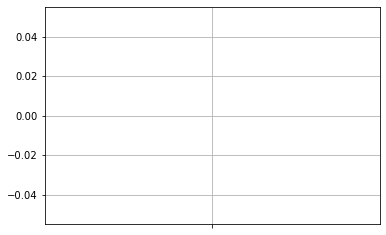

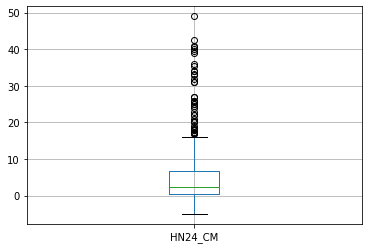

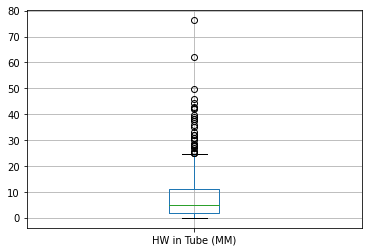

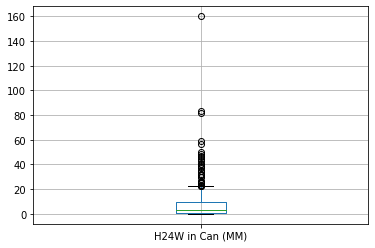

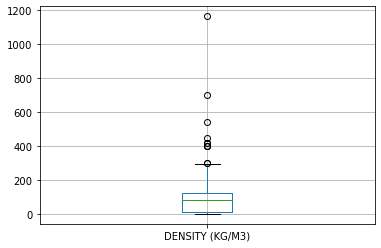

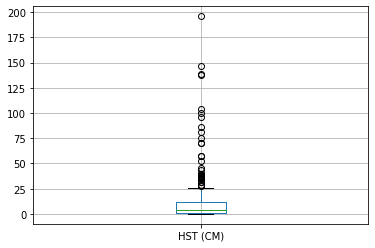

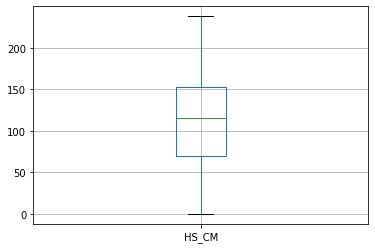

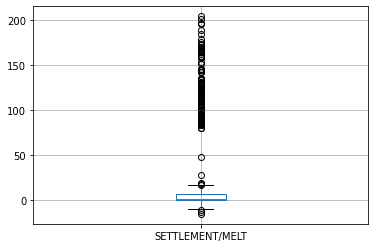

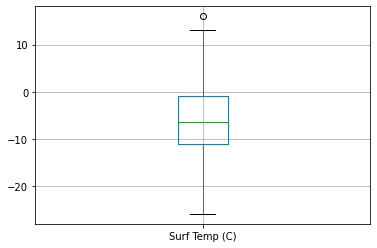

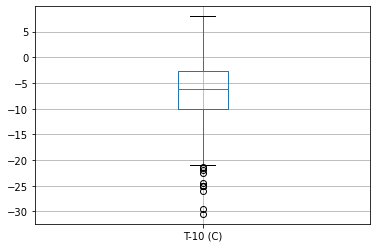

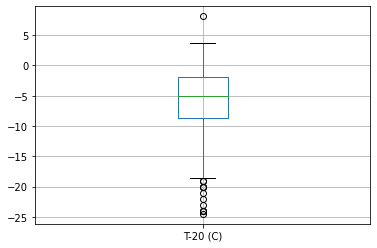

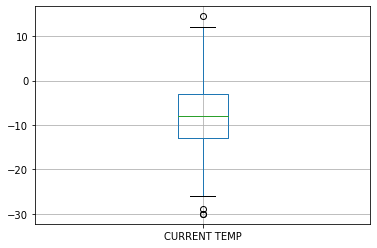

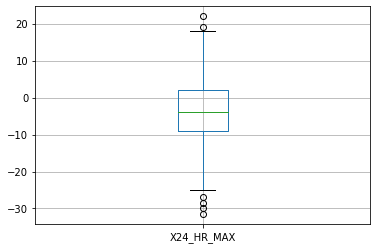

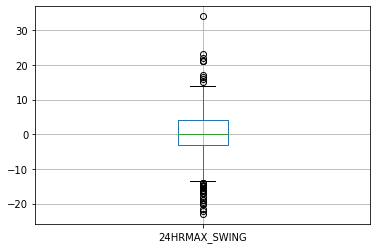

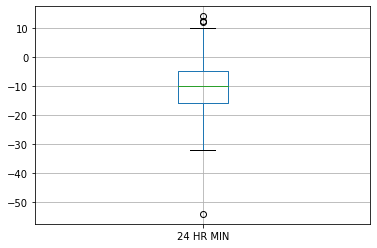

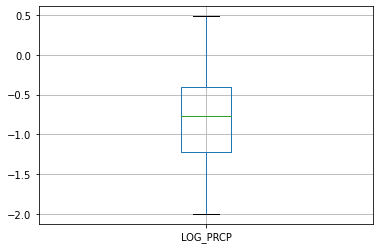

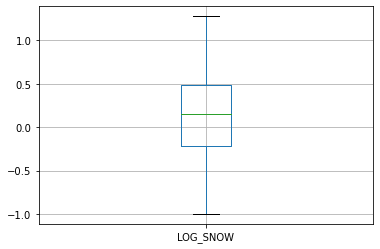

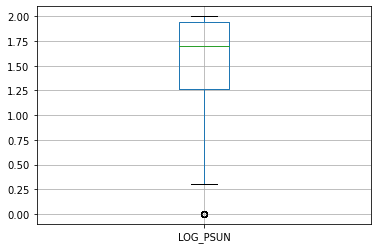

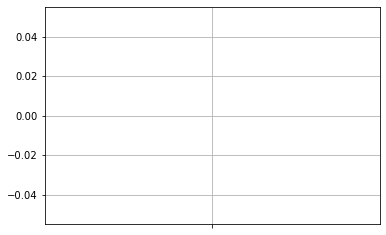

In [16]:
for i in range(0,54):
    snow.iloc[:, i:i+1].boxplot()
    plt.show()

* DENSITY max value is outlier
* Likely that HW in Tube (MM)'s max value is outlier
* Likely that H24W in Can (MM)'s max value is outlier
* Likely that TMAX_SWING_FROM_AVE's min value is outlier

In [17]:
print(snow.loc[snow['H24W in Can (MM)'] > 100]['H24W in Can (MM)'])
print(snow.loc[snow['H24W in Can (MM)'] > 100])
print("--------------------------------------------------")
print(snow.loc[snow['HW in Tube (MM)'] > 70]['HW in Tube (MM)'])
print(snow.loc[snow['HW in Tube (MM)'] > 70])
print("--------------------------------------------------")
print(snow.loc[snow['TMAX_SWING_FROM_AVE'] < -45]['TMAX_SWING_FROM_AVE'])
print(snow.loc[snow['TMAX_SWING_FROM_AVE'] < -45])

202    160.0
Name: H24W in Can (MM), dtype: float64
       DATE     SEASON  AVY_DANGER AVY_CHARACTER  WET_DANGER  DRY_DANGER  \
202  3/5/12  2011/2012         3.0           DRY           0           3   

     WET_LOOSE  WET_SLAB  WIND_SLAB  STORM_SLAB  ...  Surf Temp (C)  T-10 (C)  \
202        0.0       0.0        3.0         3.0  ...          -10.8      -6.7   

     T-20 (C)  CURRENT TEMP  X24_HR_MAX 24HRMAX_SWING  24 HR MIN  LOG_PRCP  \
202      -4.2         -16.0        -1.0          -1.0      -16.0 -1.522879   

     LOG_SNOW  LOG_PSUN  
202  0.041393  1.380211  

[1 rows x 53 columns]
--------------------------------------------------
981    76.3
Name: HW in Tube (MM), dtype: float64
        DATE     SEASON  AVY_DANGER AVY_CHARACTER  WET_DANGER  DRY_DANGER  \
981  3/15/18  2017/2018         3.0           DRY           0           3   

     WET_LOOSE  WET_SLAB  WIND_SLAB  STORM_SLAB  ...  Surf Temp (C)  T-10 (C)  \
981        0.0       0.0        3.0         0.0  ...           